<a href="https://colab.research.google.com/github/zainabbas313/MACHINE-LEARNING-MODEL-TRAINING/blob/main/ICR__Identifying__Age_Related_Conditions_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ABOUT DATA

### Dataset Description

#### Overview
The competition data comprises over fifty anonymized health characteristics linked to three age-related conditions. The goal is to predict whether a subject has been diagnosed with one of these conditions (Class 1) or has not (Class 0). This binary classification problem involves training models on provided training data and evaluating predictions on a hidden test set.

#### Files and Field Descriptions
1. **train.csv**:
   - **Id**: Unique identifier for each observation.
   - **AB-GL**: Fifty-six anonymized health characteristics. All are numeric except for **EJ**, which is categorical.
   - **Class**: A binary target where 1 indicates the subject has been diagnosed with one of the three conditions, and 0 indicates they have not.

2. **test.csv**:
   - Contains the same health characteristics as the training set but lacks the target variable. The goal is to predict the probability that a subject belongs to each of the two classes.

3. **greeks.csv**:
   - Supplemental metadata available only for the training set.
   - **Id**: Unique identifier.
   - **Alpha**: Indicates the type of age-related condition if present.
     - **A**: No age-related condition (Class 0).
     - **B, D, G**: The three age-related conditions (Class 1).
   - **Beta, Gamma, Delta**: Three experimental characteristics.
   - **Epsilon**: The date the data for this subject was collected. Note that all data in the test set was collected after the training set was collected.

4. **sample_submission.csv**:
   - A sample submission file in the correct format.
   - Contains columns: **Id, class_0, class_1**.

#### Size and Type
- **Size**: 356.88 kB for the dataset.
- **Type**: CSV files.
- **License**: Subject to Competition Rules.

### Key Features and Anonymized Data
- **Anonymized Characteristics**: The dataset contains 56 anonymized health characteristics (features) denoted by letters (e.g., AB, CD, EF) to preserve privacy. Most of these characteristics are numeric, providing a range of health metrics, while one (EJ) is categorical.
- **Supplemental Metadata**: The `greeks.csv` file includes additional metadata such as the specific type of condition (if any), experimental characteristics, and data collection dates, offering further insights into the dataset.

### Competition Context and Evaluation
#### Context
- **Bioinformatics**: This competition is part of the broader field of bioinformatics, focusing on interventions to slow and reverse biological aging and prevent age-related ailments. Predictive models can play a crucial role in developing new methods to solve health-related problems using diverse data.
- **InVitro Cell Research, LLC (ICR)**: The competition is hosted by ICR, a company specializing in regenerative and preventive personalized medicine. The goal is to enhance the performance of existing models (such as XGBoost and random forest) in predicting medical conditions.

#### Evaluation
- **Balanced Logarithmic Loss**: Submissions are evaluated using a balanced logarithmic loss to ensure each class is equally important in the final score. The formula is:
\[ \text{Log Loss} = -\frac{1}{N_0} \sum_{i=1}^{N_0} y_{0i} \log p_{0i} - \frac{1}{N_1} \sum_{i=1}^{N_1} y_{1i} \log p_{1i} \]
- **Probability Predictions**: For each observation in the test set, you must submit the probability of belonging to each class. The probabilities are rescaled to ensure they sum to one, and extreme values are clipped to avoid issues with the logarithm function.

### Practical Application
#### Benefits
- **Efficiency**: Reduces the need for long and intrusive procedures to diagnose medical conditions.
- **Privacy**: Ensures patient details remain private by using anonymized health characteristics.
- **Predictive Accuracy**: Aims to improve the reliability and consistency of predictions, which is crucial in medical contexts.

#### Impact
- **Advancement in Bioinformatics**: Successful models could significantly contribute to bioinformatics by establishing relationships between health characteristics and medical conditions.
- **Healthcare Improvements**: Efficient and accurate predictive models can lead to faster diagnosis and timely interventions, improving patient outcomes.

This dataset offers a rich and anonymized set of health-related data, providing an excellent opportunity to apply and test advanced machine learning techniques for predicting age-related medical conditions.

# LIBRARIES

In [3]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

In [4]:
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LOAD DATASET

In [5]:
df_train = pd.read_csv('/content/drive/MyDrive/Project/MACHINE LEARNING/MACHINE LEARNING & DATA SCIENCE A-Z/DATASETS/ICR - Identifying Age-Related Conditions/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Project/MACHINE LEARNING/MACHINE LEARNING & DATA SCIENCE A-Z/DATASETS/ICR - Identifying Age-Related Conditions/test.csv')

In [6]:
print(df_train.shape)
print(df_test.shape)

(617, 58)
(5, 57)


In [7]:
df_train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


# DATA CLEANING

In [8]:
df_train.columns = df_train.columns.str.lower()
df_test.columns = df_test.columns.str.lower()

In [9]:
obj_col = df_train.select_dtypes(['object']).columns
num_col = df_train.select_dtypes(['int','float']).columns

In [10]:
df_train[obj_col].describe()

,id,ej
count,617,617
unique,617,2
top,000ff2bfdfe9,B
freq,1,395


In [11]:
le = LabelEncoder()
df_train['ej'] = le.fit_transform(df_train['ej'])
df_test['ej'] = le.transform(df_test['ej'])

In [12]:
df_train.drop(['id'], axis = 1, inplace = True)

In [13]:
df_train.describe()

,ab,af,ah,am,ar,ax,ay,az,bc,bd,...,fl,fr,fs,gb,ge,gf,gh,gi,gl,class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [14]:
null_col = df_train.columns[df_train.isnull().sum() != 0]
null_col

Index(['bq', 'cb', 'cc', 'du', 'el', 'fc', 'fl', 'fs', 'gl'], dtype='object')

In [15]:
df_train = df_train.interpolate(method = 'polynomial', order = 2)

In [16]:
df_train.isnull().sum().any()

False

# DATA PRE-PROCESSING

## EDA

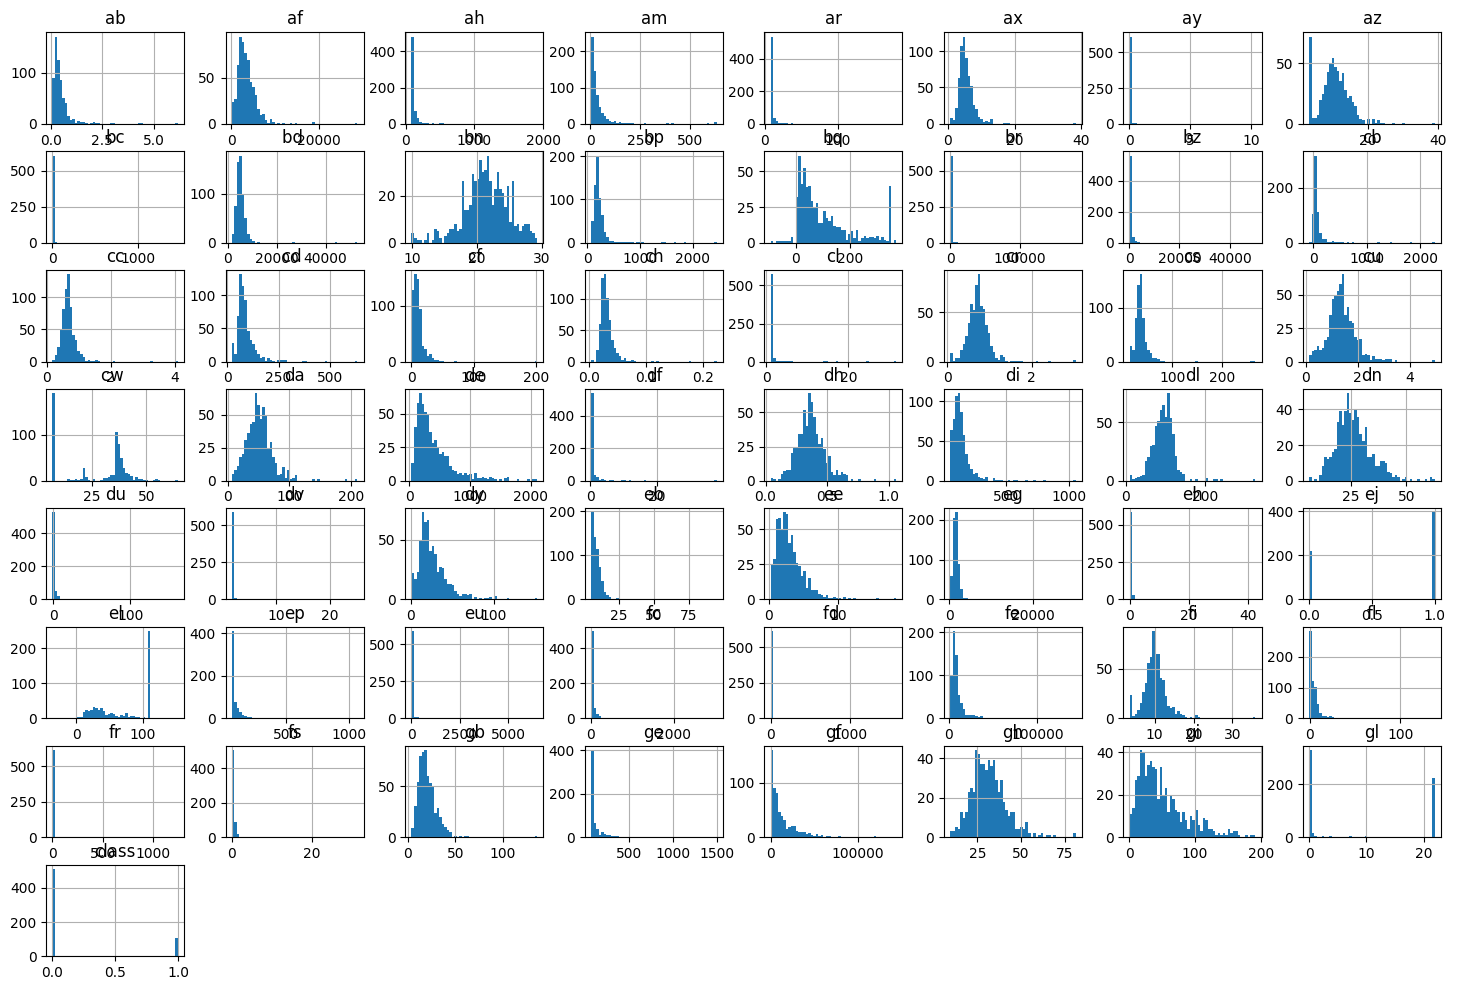

In [17]:
df_train.hist(figsize = (18,12), bins = 50)
plt.show()

In [18]:
for col in df_train.columns:
  if np.min(df_train[col]) == 0:
    print(col)

ej
class


In [19]:
df_train_hist = np.log(df_train.drop(['class','ej'], axis = 1))

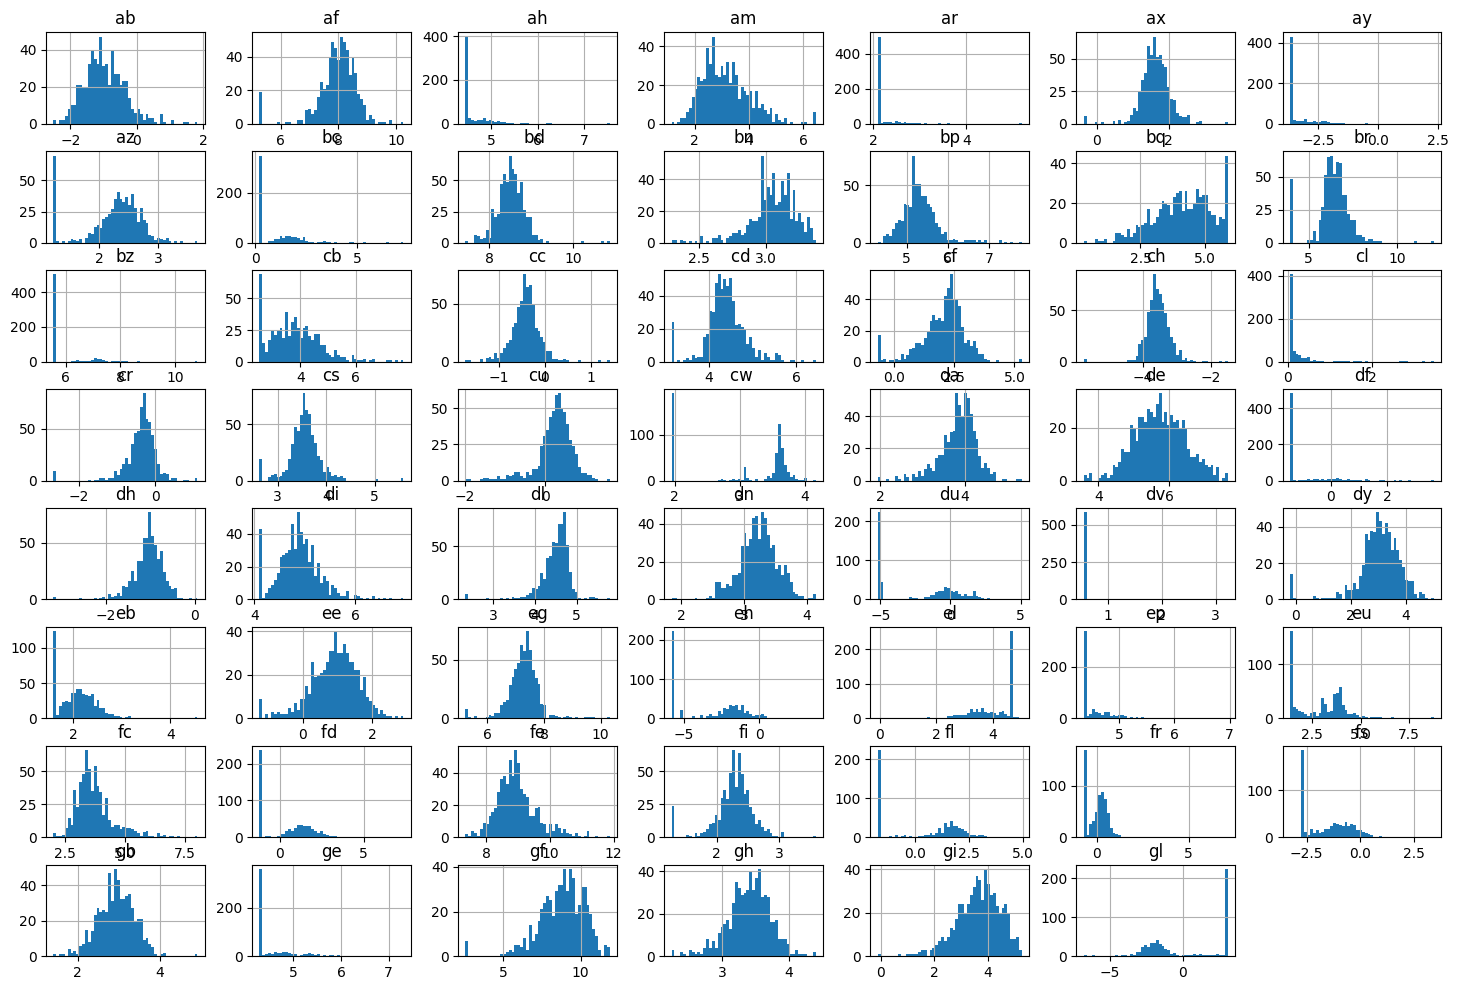

In [20]:
df_train_hist.hist(figsize = (18,12), bins = 50)
plt.show()

In [21]:
x = df_train.drop(['class'],axis = 1)
y = df_train['class']

## FEATURES SELECTION

In [22]:
model = LogisticRegression()

sfs = SFS(model,
          k_features='best',  # This should be 'best' or a specific number of features
          forward=True,
          floating=True,
          scoring='neg_mean_squared_error',  # Scoring metric for regression
          cv=5)

In [23]:
sfs.fit(x,y)

SequentialFeatureSelector(estimator=LogisticRegression(), floating=True,
                          k_features=(1, 56), scoring='neg_mean_squared_error')

In [43]:
selected_features = list(sfs.k_feature_names_)
x = df_train[selected_features]

In [44]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

# MODEL TRAINING

In [45]:
model_r =  RandomForestClassifier()
model_r.fit(xtrain,ytrain)

RandomForestClassifier()

In [46]:
pred = model_r.predict(xtest)

In [47]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       101
           1       0.89      0.70      0.78        23

    accuracy                           0.93       124
   macro avg       0.91      0.84      0.87       124
weighted avg       0.93      0.93      0.92       124



# PREDICTIONS OF TEST DATASET

In [37]:
model = RandomForestClassifier()

In [38]:
model.fit(x,y)

RandomForestClassifier()

In [41]:
pred_probs = model.predict_proba(df_test[selected_features])

predictions = pd.DataFrame({
    'id': df_test['id'],
    'class_0': pred_probs[:, 0],
    'class_1': pred_probs[:, 1]
})




In [42]:
predictions.to_csv('predictions.csv', index=False)